#### Classification Problem

In  this chapter we will be using the MNIST dataset , which is a set of 70,000 small images of digeis handwrittn by high school students and employees o f the US Census Bureau. Each image is labeled with the digit it represents

Scikit- learn provides many helper functions to download popular datasets. MNIST is one of them 

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784',version=1)

###### run above as administrator

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [5]:
mnist['data'][0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [6]:
mnist['target'][0]

'5'

In [7]:
mnist['target_names'][0]

'class'

#### We are interested in data and target columns so lets create features and labels out of these columns

In [8]:
X,y = mnist['data'],mnist['target']

In [9]:
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

There are 7000 images and each image has 784 features - this is because each image is 28x28 pixels and each feature represents 
one pixel's intensity from 0-white to 255-black

All we have to do take a instance of a vector and reshape it to 28x28 array and display using matplot lib

In [11]:
import matplotlib
import matplotlib.pyplot as plt

In [12]:
some_digit = X[0]

In [13]:
some_digit_image = some_digit.reshape(28,28)

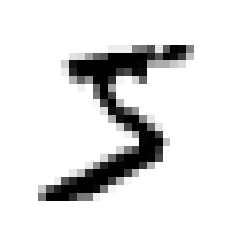

In [14]:
plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()

In [15]:
# let's see what is the label against this 
y[0]

'5'

In [16]:
# its five
import numpy as np

In [17]:
# note that this is a string so lets convert it into a interger
y = y.astype(np.uint8)

In [18]:
# training and test split
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [19]:
y_train_5 = (y_train ==5)

In [20]:
y_test_5 = (y_test ==5)

In [21]:
y_train_5[0]

True

In [22]:
y_test_5[0]

False

In [23]:
# lets pick a classifier

In [24]:
from sklearn.linear_model import SGDClassifier

In [25]:
sgd_clf = SGDClassifier(random_state = 42)

In [26]:
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [27]:
sgd_clf.predict([some_digit])

array([ True])

In [28]:
# Lets check cross validation score on accuracy

from sklearn.model_selection import cross_val_score

In [29]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

### Confusion Matrix

In [30]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

## Precision and Recall

In [33]:
from sklearn.metrics import precision_score, recall_score

In [34]:
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [35]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

## F1 Score

In [36]:
from sklearn.metrics import f1_score

In [37]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

## Working with threshold

In [38]:
y_scores = sgd_clf.decision_function([some_digit])

In [39]:
y_scores

array([2164.22030239])

In [40]:
threshold = 8000
y_some_digit_pred = (y_scores> threshold)

In [41]:
y_some_digit_pred

array([False])

In [42]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3, method='decision_function')

In [43]:
from sklearn.metrics import precision_recall_curve

In [44]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

In [45]:
thresholds


array([-106527.45300471, -105763.22240074, -105406.2965229 , ...,
         38871.26391927,   42216.05562787,   49441.43765905])

In [92]:
len(thresholds)

59966

In [46]:
thresholds.shape

(59966,)

In [47]:
# Plotting the precision and recall along with threshold

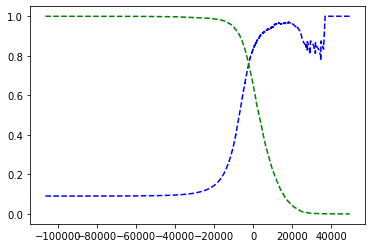

In [48]:
plt.plot(thresholds,precisions[:-1],"b--",label="precision")
plt.plot(thresholds, recalls[:-1],"g--",label="recall")
plt.show()

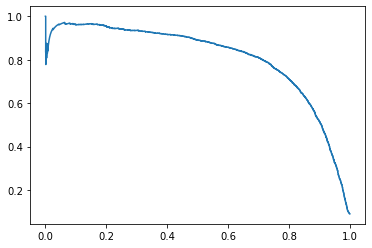

In [49]:
## plotting the precision against the recall
plt.plot(recalls,precisions)


In [50]:
y_train_pred[0]

True

In [51]:
y_train_pred.shape

(60000,)

In [56]:
threshold_90_pred = thresholds[np.argmax(precisions>=0.90)]
threshold_90_pred

# Note that np.argmax() will return a index where precision is >= .09, and we are checking at this index what is the value
# of threshold

3370.0194991439557

In [53]:
y_train_pred_90 = (y_scores >=threshold_90_pred)

In [54]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [55]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

### ROC curve 

In [57]:
from sklearn.metrics import roc_curve

In [59]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

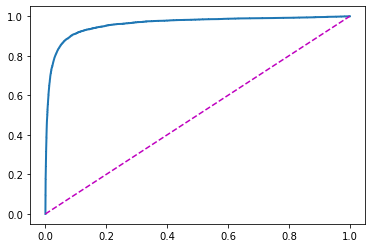

In [69]:
plt.plot(fpr,tpr,linewidth=2,label='sgd')
plt.plot([0,1],[0,1],'m--')
plt.show()

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
forest_clf = RandomForestClassifier()

In [74]:
y_probas_forest = cross_val_predict(forest_clf, X_train,y_train_5,cv=3,method='predict_proba')

In [79]:
y_probas_forest.shape

(60000, 2)

In [80]:
y_probas_forest[: ,1].shape

(60000,)

In [81]:
y_score_forest = y_probas_forest[: ,1]

In [82]:
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5, y_score_forest)

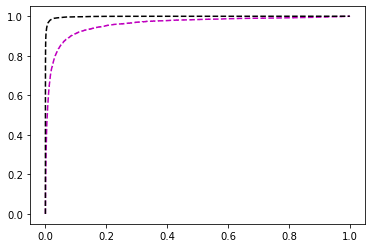

In [85]:
plt.plot(fpr,tpr,'m--',label='SGD')
plt.plot(fpr_forest,tpr_forest,'k--')
plt.show()